## Описание проекта
Анализируем работу крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Часть 1. Приоритизация гипотез.

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

#### Описание данных первой части

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats

In [2]:
pd.set_option("display.max_colwidth", 150)

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
#Считаем ICE для наших гипотез
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
hypothesis.sort_values(by='ICE', ascending=False)[['Hypothesis', 'ICE']]

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Заметно лучше других выглядят гипотезы "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 

Немного отстают гипотезы "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа". 

Гипотезы "Запустить собственную службу доставки, что сократит срок доставки заказов", "Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов", "Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар" и "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей" выглядят совсем никудышными.

In [6]:
#Считаем RICE для наших гипотез
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by='RICE', ascending=False)[['Hypothesis', 'RICE', 'ICE']]

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.20
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.12
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.33
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.00


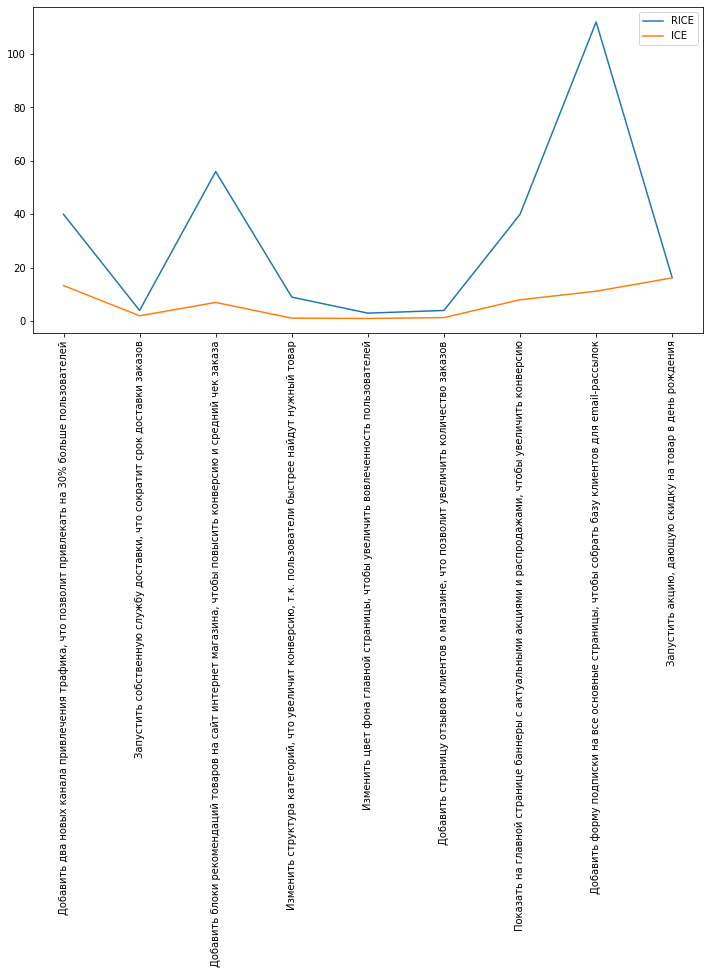

In [24]:
#график
plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')

plt.plot(hypothesis['Hypothesis'], hypothesis['RICE'], label='RICE')
plt.plot(hypothesis['Hypothesis'], hypothesis['ICE'], label='ICE')
plt.legend();

Для RICE картина поменялась. В уверенном топе  гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

### Вывод
В топ-5 у нас те же гипотезы, что были и для ICE, но порядок изменился. Все дело в том, что добавился параметр Reach - скольких пользователей затронет наше изменение. Поэтому гипотеза с добавлением формы подписки скакнула с 3го места на первое, Добавить блоки рекомендаций  - с 5го на 2е, поскольку они коснутся всех пользователей. 

А безусловный лидер с большим отрывом ICE - скидка на ДР - упал аж 5е место, потому что затронет только 1/365 пользователей в день - всего-то 0,3%!!!

### Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

#### Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений: 
    - 1. Остановить тест, зафиксировать победу одной из групп. 
    - 2. Остановить тест, зафиксировать отсутствие различий между группами. 
    - 3. Продолжить тест.

#### Данные для второй части
##### Файл /datasets/orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
##### Файл /datasets/visitors.csv. Скачать датасет
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [26]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = pd.to_datetime(orders['date'], format="%Y-%m-%d")
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [27]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = pd.to_datetime(visitors['date'], format="%Y-%m-%d")
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [28]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [29]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max','group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [30]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


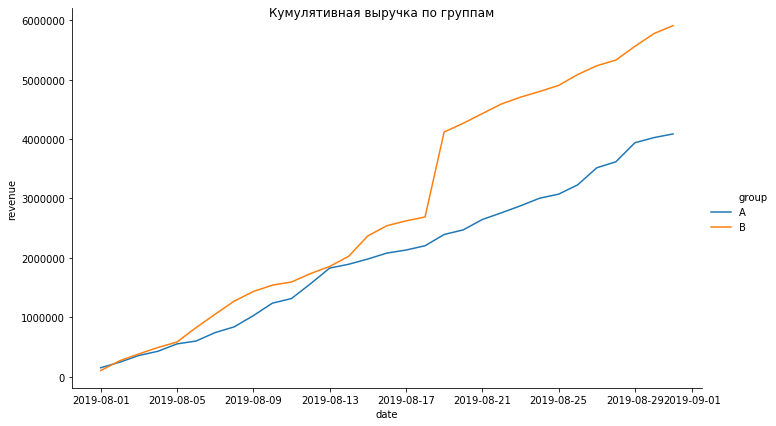

In [31]:
#график
ax_cumulative_revenue = sns.relplot(x="date", y="revenue", hue="group", kind="line", data=cumulativeData, height=6, aspect=10/6);
ax_cumulative_revenue.fig.suptitle("Кумулятивная выручка по группам");

<font color = 'purple'> Посмотрим, что необычного произошло 18-19 августа

In [45]:
cumulativeData[(cumulativeData['date'] < '2019-08-21') & (cumulativeData['date'] > '2019-08-17')]

,date,group,orders,buyers,revenue,visitors
34,2019-08-18,A,328,300,2202167,11127
35,2019-08-18,B,382,357,2686621,11171
36,2019-08-19,A,350,320,2391910,11629
37,2019-08-19,B,403,377,4116541,11658
38,2019-08-20,A,362,330,2469529,12204
39,2019-08-20,B,423,396,4263815,12218


###### Вывод
Поначалу обе группы показывают похожие результаты, хотя и выручка группы В растет немного лучше. 
<font color = 'purple'> Но 19го числа выручка у группы В почти удвоилась с 2 миллионов 300 тысяч до 4 миллионов с лишним, при этом не было роста ни числа покупателей (20), ни количества заказов (21).<font color = 'black'> Очень похоже на выброс.

- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

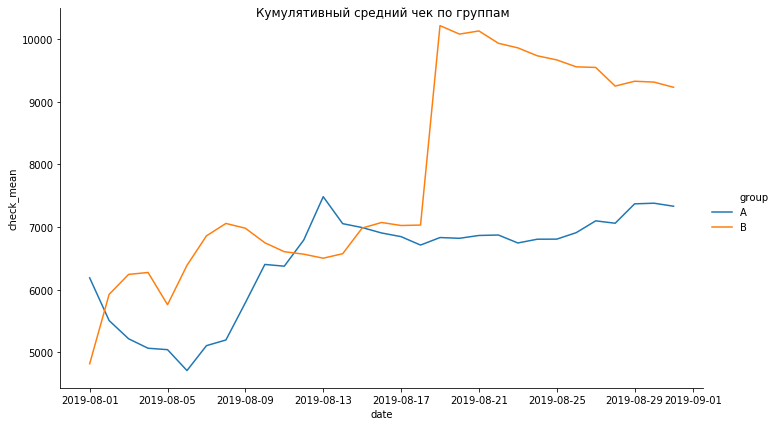

In [12]:
cumulativeData['check_mean'] = cumulativeData['revenue'] /cumulativeData['orders']
#график
ax_cumulative_check_mean = sns.relplot(x="date", y="check_mean", hue="group", kind="line", data=cumulativeData, height=6, aspect=10/6);
ax_cumulative_check_mean.fig.suptitle("Кумулятивный средний чек по группам");

###### Вывод
<font color = 'purple'>Что ж, этот скачок выручки у группы В 19 августа, естественно, повлиял и на график среднего чека.<font color = 'black'> Первые 2 недели обе метрики довольно сильно прыгают, потом стабилизируются. Но если в случает с выручкой группа В почти все время была лучше, то здесь мы видим,что после предположительного выброса 19.08 средний чек у группы В стабильно идет вниз.

- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

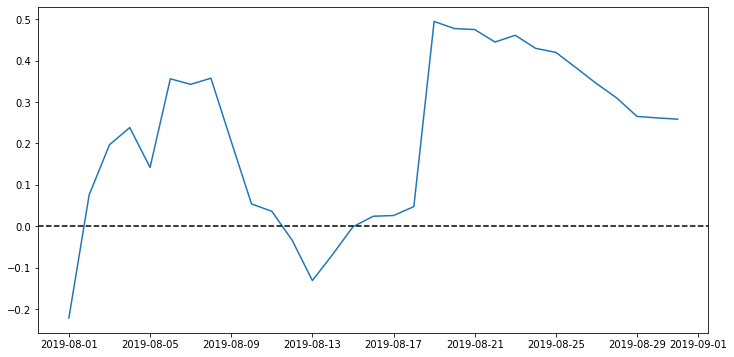

In [48]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

#### Вывод
Помимо 19 августа, видим еще резкие скачки, самый сильный - 8-9 августа. <font color = 'purple'>Это момент, когда группа А догнала группу B по кумулятивной выручке и вышла вперед по среднему чеку.<font color = 'black'>

- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

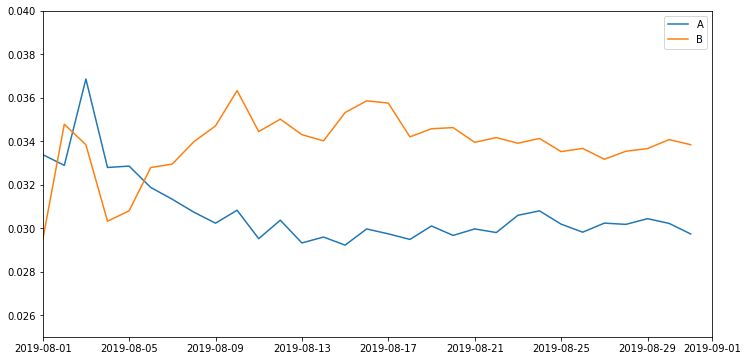

In [50]:
#кумулятивная конверсия
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#графики
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0.025, 0.04]);


###### Вывод
В начале теста большая конверсия была у группы А, но менее чем через неделю,  вперед вышла группа В и оба сегмента выравниваются примерно через 10 дней после начала теста и дальше идут параллельно.

- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [51]:
#сливаем данные конверсии по группам в один датафрейм
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


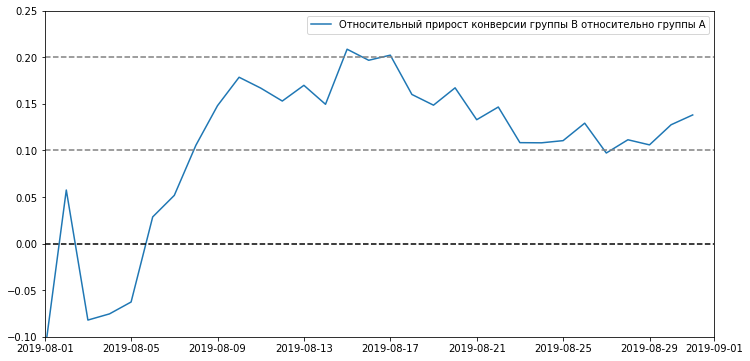

In [53]:
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.1, 0.25]);


#### Вывод
Довольно скоро от начала эксперимента группа В вырывается вперед, в лучший момент показывает прирост в 20% относительно А, но потом немного сдает позиции и фиксируется около 10-12%.

- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [54]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


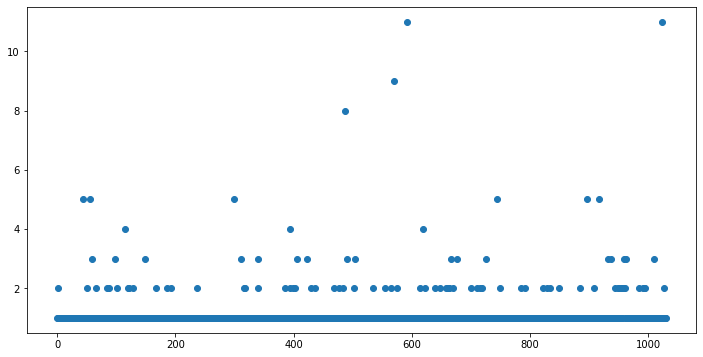

In [55]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12,6))
plt.scatter(x_values, ordersByUsers['orders']);

#### Вывод
Большинство пользователей делают 1-2 заказа. Больше 3х уже считанные единицы, а у нас есть и пользоваатели с 5ю, 8ю и даже 11ю заказами. Не они ли явились причиной выбросо, которые мы видели в предыдущих графиках?

- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [56]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

#### Вывод
Только 5% сделали больше 2х заказов и только 1% больше 4х. За границу аномальных пользователей возьмем 4 и более заказов. Так откинем верхний 1% с максимальным числом заказов.

- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [57]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


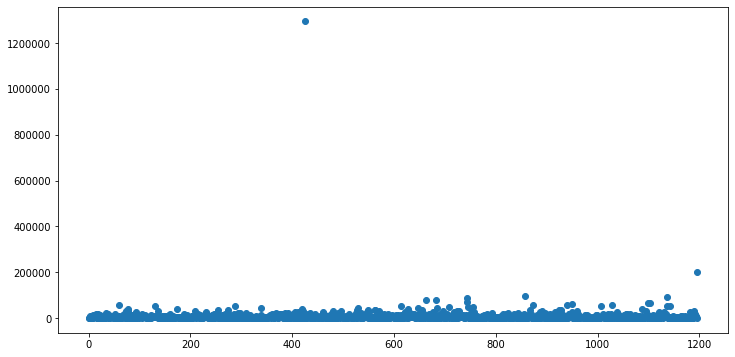

In [58]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders['revenue']);

In [59]:
orders['revenue'].max()

1294500

In [60]:
orders[orders['revenue'] == orders['revenue'].max()]

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


#### Вывод
Заказов больше 200 тысяч всего один, остальные крупные все меньше 100 тысяч. <font color = 'purple'>Единственный заказ на миллион триста тысяч выглядит очевидным выбросом. По дате он как раз совпадает с неадекватными скачками графиков кумулятивной выручки и среднего чека, которые мы наблюдали выше. Вот и он - больной зуб! <font color = 'black'> 

- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [61]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

#### Вывод
Не более 5% заказали более, чем на 28 тысяч, не более 1% - на 58. Откинем пользователей, совершивших заказы дороже 40 000.

- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [62]:
ordersADaily = (orders[orders['group']=='A'][['date', 'transactionId', 'visitorId']].groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique}))  
ordersADaily.columns = ['date', 'ordersPerDateA']

ordersBDaily = (orders[orders['group']=='B'][['date', 'transactionId', 'visitorId']].groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique}))
ordersBDaily.columns = ['date', 'ordersPerDateB']

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')

data.head(3)

,date,ordersPerDateA,ordersPerDateB,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,24,21,719,713
1,2019-08-02,20,24,619,581
2,2019-08-03,24,16,507,509


In [63]:
#пользователи, которые заказывали в группе А
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

#пользователи, которые заказывали в группе В
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']


In [64]:
# готовим выборки для проверки Манна-Уитни
sampleA = (pd.concat([ordersByUsersA['orders'],
                      pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() 
                                                   - len(ordersByUsersA['orders'])), name='orders')],axis=0))

sampleB = (pd.concat([ordersByUsersB['orders'],
                      pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() 
                                                   - len(ordersByUsersB['orders'])), name='orders')],axis=0))


In [65]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.00840


In [66]:
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/
                       (data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.138


#### Вывод
p-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. По сырым данным по конверсии - между группами есть статистически значимые различия. Относительный прирост конверсии группы В относительно А - 13,8%.

- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [67]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


0.365
0.259


#### Вывод
p-value > 0.05, статистически значимых отличий в среднем чеке нет, при этом средний чек группы В больше на 26%. Такой прирост  выглядит странным при отсутствии статистических различий. Возможно, дело в выбросах.

- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [68]:
#выделяем срез пользователей у которых больше, чем 3 заказа и с заказами дороже 40 000
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.shape

(38,)

всего 38 таких пользователей

In [69]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0)



In [70]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00547
0.145


#### Вывод
на очищенных данных p-value стал еще меньше, статистически значимые различия подтверждены. Относительный прирост конверсии группы В относительно А стал еще больше - 14,5% против 13,8%.

- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [71]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(orders[np.logical_and(orders['group']=='B',
         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/ orders[np.logical_and(orders['group']=='A', 
                                         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))


0.387
0.057


#### Вывод
Поскольку у нас две независимые выборки, в которых явно имеются выбросы, то мы применяли непараметрический тест, основанный на структурном подходе - U-критерий Манна-Уитни.<font color = 'black'>

на очищенных данных p-value стал еще больше, статистически значимых отличий в среднем чеке нет. А относительное отличие по
среднему чеку группы В упало с 26% до 6%. Это больше похоже на правду, учитывая, что нет статистически значимых отличий между тестируемыми группами.
Вот что отброшенные заказы на 1 300 000 делают!

- Примите решение по результатам теста и объясните его. Варианты решений: 
    - 1. Остановить тест, зафиксировать победу одной из групп. 
    - 2. Остановить тест, зафиксировать отсутствие различий между группами. 
    - 3. Продолжить тест.

## Вывод
- Есть статистически значимые различия по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий, конверсия для группы В лучше на 14,5%;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, после фильтрации средний чек для группы В выше на 6%. 
- График различия конверсии между группами говорит нам, что результаты группы B стабильно лучше группы A и нет тенденции к изменению этого соотношения;
- У график различия среднего чека слишком большие колебания за счет аномалий, чтобы делать по нему выводы.

То есть конверсия у группы В значительно лучше (14,5%), но по среднему чеку критерий Манна-Уитни не показал наличия статистически значимых различий. Тем не менее, на очищенных данных мы получили относительный прирост среднего чека почти в 6% для группы В относительно А. Это хороший показатель. Поэтому - 

### Предлагается решение - остановить тест, зафиксировать победу группы В.